<h1>Predicting Diamond Prices</h1>
<h2>Phase 2: Statistical Modelling</h2>
<h4>Group Name: Group 15</h4>
<h5>Name: Evelyn Lie (s3951140)</h5>
<h5>Name: Edward Lim Padmajaya (s3957503)</h5>
<h5>Name: Go Chee Kin (s3955624)</h5>
<h5>Name: Frandom Leo Inovejas (s3923193)</h5>

## Table of Contents
* [Introduction](#intro) 
  + [Phase 1 Summary](#phase1-summary)
  + [Report Overview](#report-overview)
  + [Overview of Methodology](#overview-methodology)
* [Statistical Modelling](#stats) 
  + [Full Model Overview](#full-model-overview)
  + [Full Model Diagnostic Checks](#diagnostic-check)
  + [Backward Feature Selection](#backward-selection)
  + [Reduced Model Overview](#reduce-overview)
  + [Reduced Model Diagnostic Checks](#reduce-diagnostic)
* [Critique and Limitations](#critique-limitation)
* [Summary and Conclusion](#summary-and-conclusion)
  + [Project Summary](#full-model-overview)
  + [Summary of Findings](#summary-findings)
  + [Conclusions](#conclusions)
* [References](#references)

<a id="intro"></a><h3><b>Introduction</b></h3>
<a id="phase1-summary"></a><h4>Phase 1 Summary</h4>
In Phase 1, we have defined the objective of our report, which is predicting the diamond's price in US dollars based on the available features provided in the diamond's dataset. Subsequently, we conducted data cleaning process by removing outliers which has a higher and lower carat than 1.5 times of the interquantile range, and identified if there any missing values occurs within the dataset. However, the dataset is complete thus not containing any missing value. Eventually, we visualised and explored the dataset using 15 figures that plot and illustrate the relationship between different variables using Seaborn and Matplotlib. An explanation is provided for each plot to analyse the patterns, correlations, and trends occured. Finally, comprehensive summary and conclusion are written to demonstrate the insights gained from Phase 1, and establish its connections with our objectives. References are added at the end to cite any dataset and information used in APA format as required.
    
Informations and analysis obtained from Phase 1 would contribute to further investigation on this multiple linear regression problem using statistical modelling to evaluate the relationship between a predictor variable and the response variable (price of diamond) while controlling the potential influence of other diamond's variables. This would assist in predicting the diamond's price strategically using its different variables in Phase 2.

<a id="report-overview"></a><h4>Report Overview</h4>
In this report, statistical modelling will be done with several steps. In order to forecast the price of diamonds using all of the available features, we first fit a multiple linear regression in the Full Model Overview. We firstly rename a few of the column names in our Full Model Overview because we did not do so in our Data Preprocessing and Cleaning section in our Phase 1 report. Next, we use the Statsmodels module to create the regression formula as a Python string that contains all of the independent variables from our dataset. The categorical features in our dataset are then one-hot encoded using Pandas' get_dummies function, and the regression model formula is updated to include the encoded features.

After defining the regression model formula, we create an ordinary least squares (OLS) model to the encoded features. The OLS regression results table contains numerous informations about the dataset, such as the dependent variable, number of observations, degree of freedom of residuals, the R-squared and Adjusted R-squared value, F-statistics, the coefficient term, standard error parameters, t-statistics, p-values, and confidence intervals. In order to better comprehend the difference between the real and predicted prices of diamonds, we then establish a new data frame to hold the actual price of diamonds, the predicted price of diamonds, as well as its residuals.

Next, we check whether the multiple linear regression model is valid or not by running diagnostic checks with 4 assumptions to satifsy, which are linearity, nearly normal residuals, constant variability, and independence of residuals. In backwards feature selection, we eliminate features that are not statistically significant by looking that features whose p-value is above 0.05 since statistical significance is indicated by a p-value of less than 0.05. We create a new OLS model and data frame that stores the actual price of diamonds, the predicted price of diamonds, and its residuals as well as to validate whether the model satisfies the previous 4 assumptions in our Reduced Model Overview and Reduced Model Diagnostic Checks. This is similar to what we did in the Full Model Overview and Full Model Diagnostic Checks, but with the insignificant features eliminated.

<a id="overview-methodology"></a><h4>Overview of Methodology</h4>
Due to the fact that more than one predictor variable is required to predict the response variable, multiple linear regression is an extension of simple linear regression. This crucial regression procedure simulates the linear relationship between a single continuous dependent variable and a number of independent variables. By fitting the optimal linear relationship, it uses two or more independent variables to predict a dependent variable.

In order to adopt our methodology for estimating diamond prices, we will first review our phase 1 report and rename any columns in the Data Cleaning and Preprocessing section that were left unaltered. After that, we will be able to obtain the statistical model formula for the diamond dataset. We will then create a new data frame called residuals full to display the comparison between the actual price and the projected price as well as the residuals for the entire model. The regression residuals and anticipated values will be plotted using this data frame.

<a id="stats"></a><h3><b>Statistical Modelling</b></h3>
<a id="full-model-overview"></a><h4>Module Imports</h4>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('Phase2_Group15.csv')
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


<a id="full-model-overview"></a><h4>Full Model Overview</h4>
<p>In order to estimate the price of diamonds, we first construct a multiple linear regression using all the features in this dataset. However, since we did not renamed some of the column in the data cleaning and preprocessing section of our Phase 1 report, we must do so before continuing with the full model overview. </p>

In [25]:
df = df.rename(columns={"depth": "total_depth_percentage", "x": "length", "y": "width", "z": "depth"})

Next, we get the statistical model formula of this dataset in a Python string form.

In [26]:
formula_string_vars = ' + '.join(df.drop(columns='price').columns)
formula_string = 'price ~ ' + formula_string_vars
print('formula_string: ', formula_string)

formula_string:  price ~ carat + cut + color + clarity + total_depth_percentage + table + length + width + depth


Then, we create a new formula string containing the encoded features by using the get_dummies() function to one-hot encode categorical features. But first, we need to replace the whitespace in the cut quality categorical feature with an underscore sign. This is because it contains a variable called "Very Good" and the whitespace would cause the Statsmodels module to output an "invalid syntax" error.

In [27]:
# Replace the whitespace with underscore for all variable that has a whitespace
categoricalColumns = df.columns[df.dtypes==object].tolist()
for col in categoricalColumns:
    df[col] = df[col].str.replace(' ', '_')

data_encoded = pd.get_dummies(df, drop_first=True)
data_encoded.head()

,carat,total_depth_percentage,table,length,width,depth,price,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [28]:
formula_string_vars_encoded = ' + '.join(data_encoded.drop(columns='price').columns)
formula_string_encoded = 'price ~ ' + formula_string_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  price ~ carat + total_depth_percentage + table + length + width + depth + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2


Now that we have defined our statistical model formula as a Python string, we fit an OLS (ordinary least squares) model to our encoded data with "price" being the dependent variable.

In [29]:
full_model = sm.formula.ols(formula=formula_string_encoded, data=data_encoded)
full_model_fitted = full_model.fit()
print(full_model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:16:17   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2184

The whole model's adjusted R-squared value is 0.920, which indicates that the model only accounts for 92% of the variance. By looking at the p-values, we observe that the majority of them are highly significant, though there is 1 insignificant variable, which is the width variable becuase it's p-value of 0.619 implies that there is a 61.9% likelihood that it has no impact on the dependent/target variable, price. To see the comparison between the actual price and the predicted price as well as the residuals for the whole model, we will now construct a new data frame named residuals full. This data frame will be used to plot the predicted values and the regression residuals.

In [30]:
residuals_full = pd.DataFrame({'actual': data_encoded['price'], 
                               'predicted': full_model_fitted.fittedvalues, 
                               'residual': full_model_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,326,-1346.364288,1672.364288
1,326,-664.595411,990.595411
2,327,211.107106,115.892894
3,334,-830.737177,1164.737177
4,335,-3459.224220,3794.224220
5,336,-1380.487569,1716.487569
6,336,-397.875201,733.875201
7,337,-1073.323502,1410.323502
8,337,-1040.023136,1377.023136
9,338,-420.417884,758.417884


The scatter plot below shows the correlation between the actual and expected price values. We can observe from Figure 1 below that the model makes several predictions above 20,000 about the price of diamonds, even though there are no diamonds in the dataset with prices higher than that.

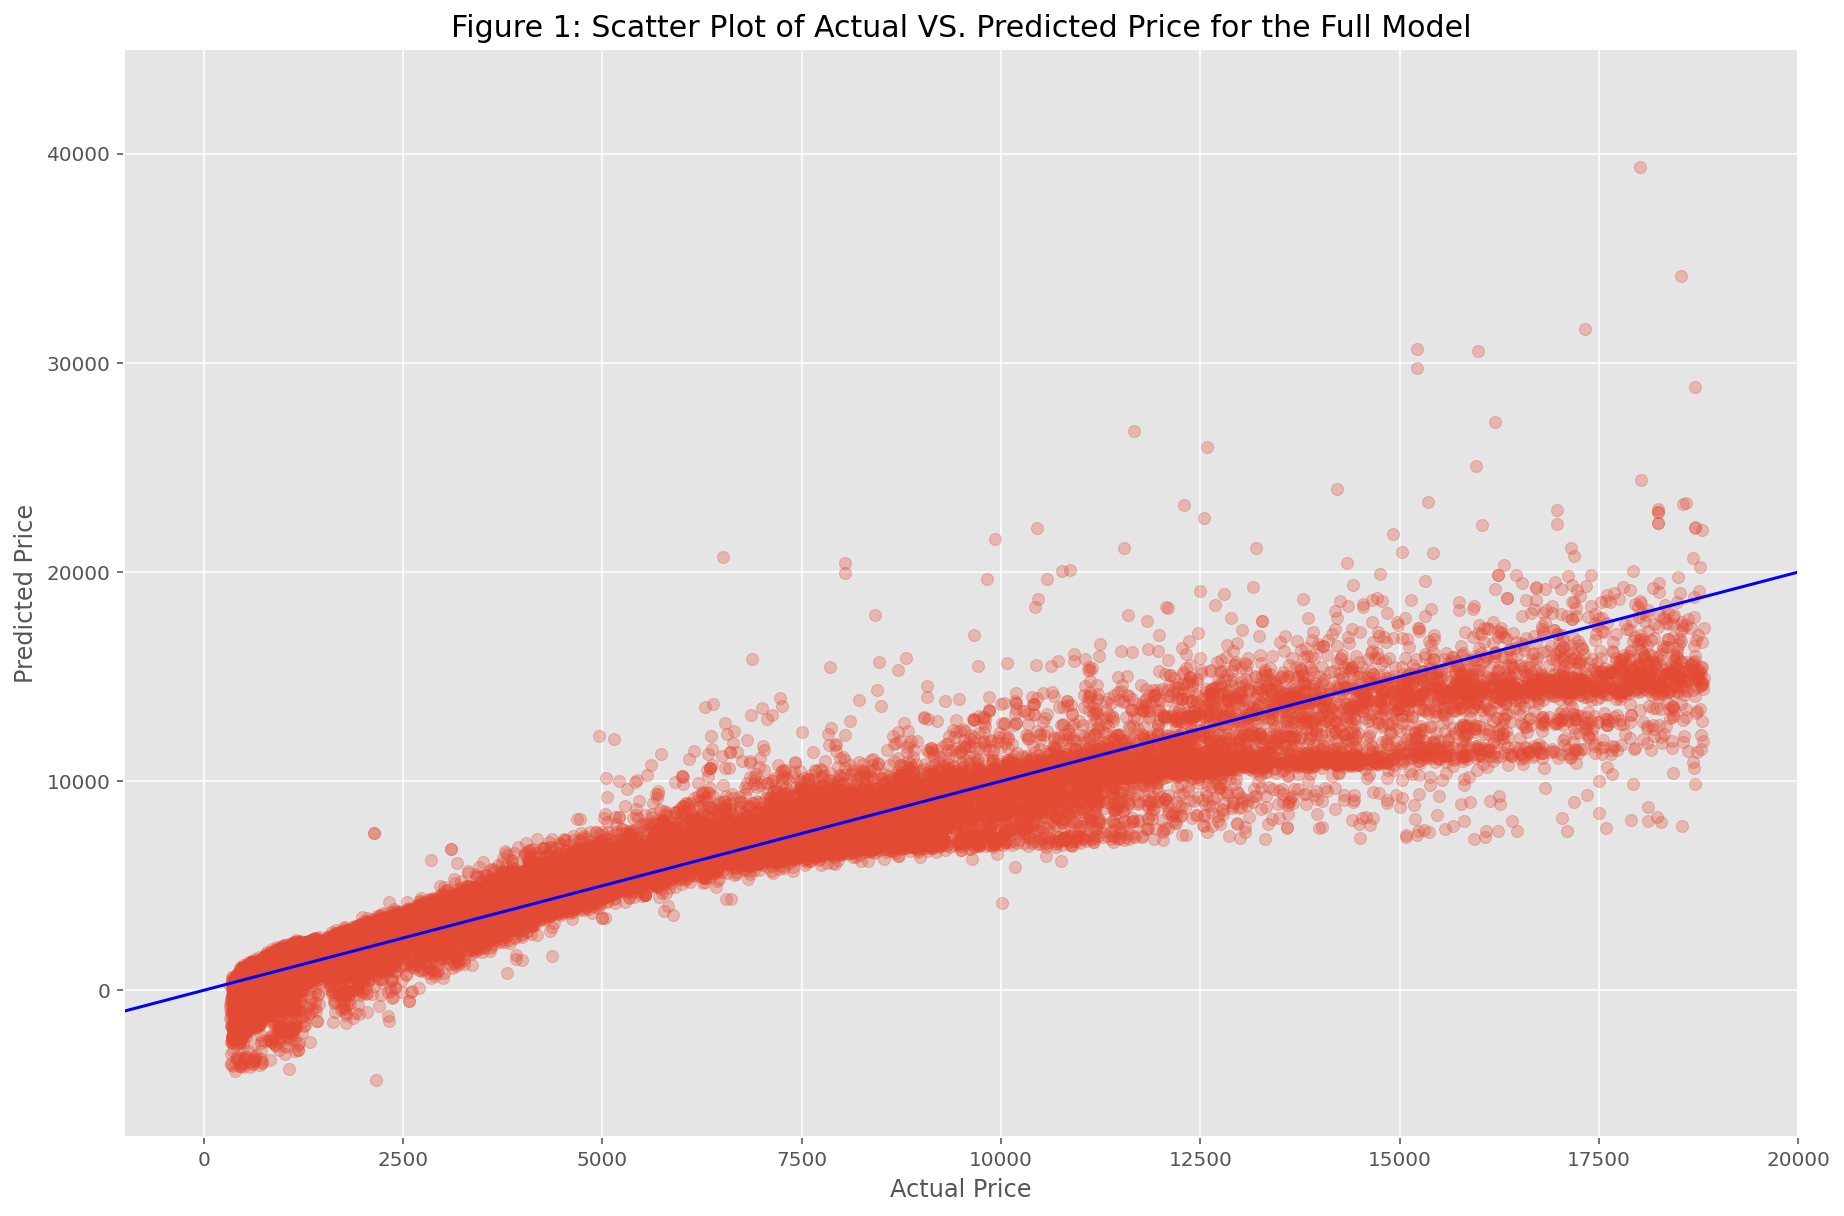

In [31]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3)
plt.xlim(-1000, 20000)
plt.ylim(-7000, 45000)
plot_line(axis=plt.gca(), slope=1, intercept=0, c="blue")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Figure 1: Scatter Plot of Actual VS. Predicted Price for the Full Model', fontsize=15)
plt.show()

<a id="diagnostic-check"></a><h4>Full Model Diagnostic Checks</h4>

Multiple linear regression model has 4 conditions to satisfy:
- __Linearity__: Variable is linearly related to the outcome
- __Nearly Normal Residuals__: Residuals of model nearly normal
- __Constant Variability__: Variability of residuals is nearly constant
- __Indepedence of Residuals__: Residuals are independent

Diagnostic plots are used below to determine the validity of the model.

In Figure 2, the residual plot compare residuals and the predicted price since this is a multiple linear regression problem which means that having a comparison between residuals and each exploratory variable would not be helpful in providing a full overview in the dataset. The residual plot shows that it does not satisfy the constant variability conditions for this multiple linear regression full model, having the residuals not centred around 0. Instead, the residuals present a negative trend since the residual value would decrease as the predicted price increase. Note that residual value is used on the y-axis instead of predicted price to avoid possible violations like collinearity between the predictors when checking its linearity.

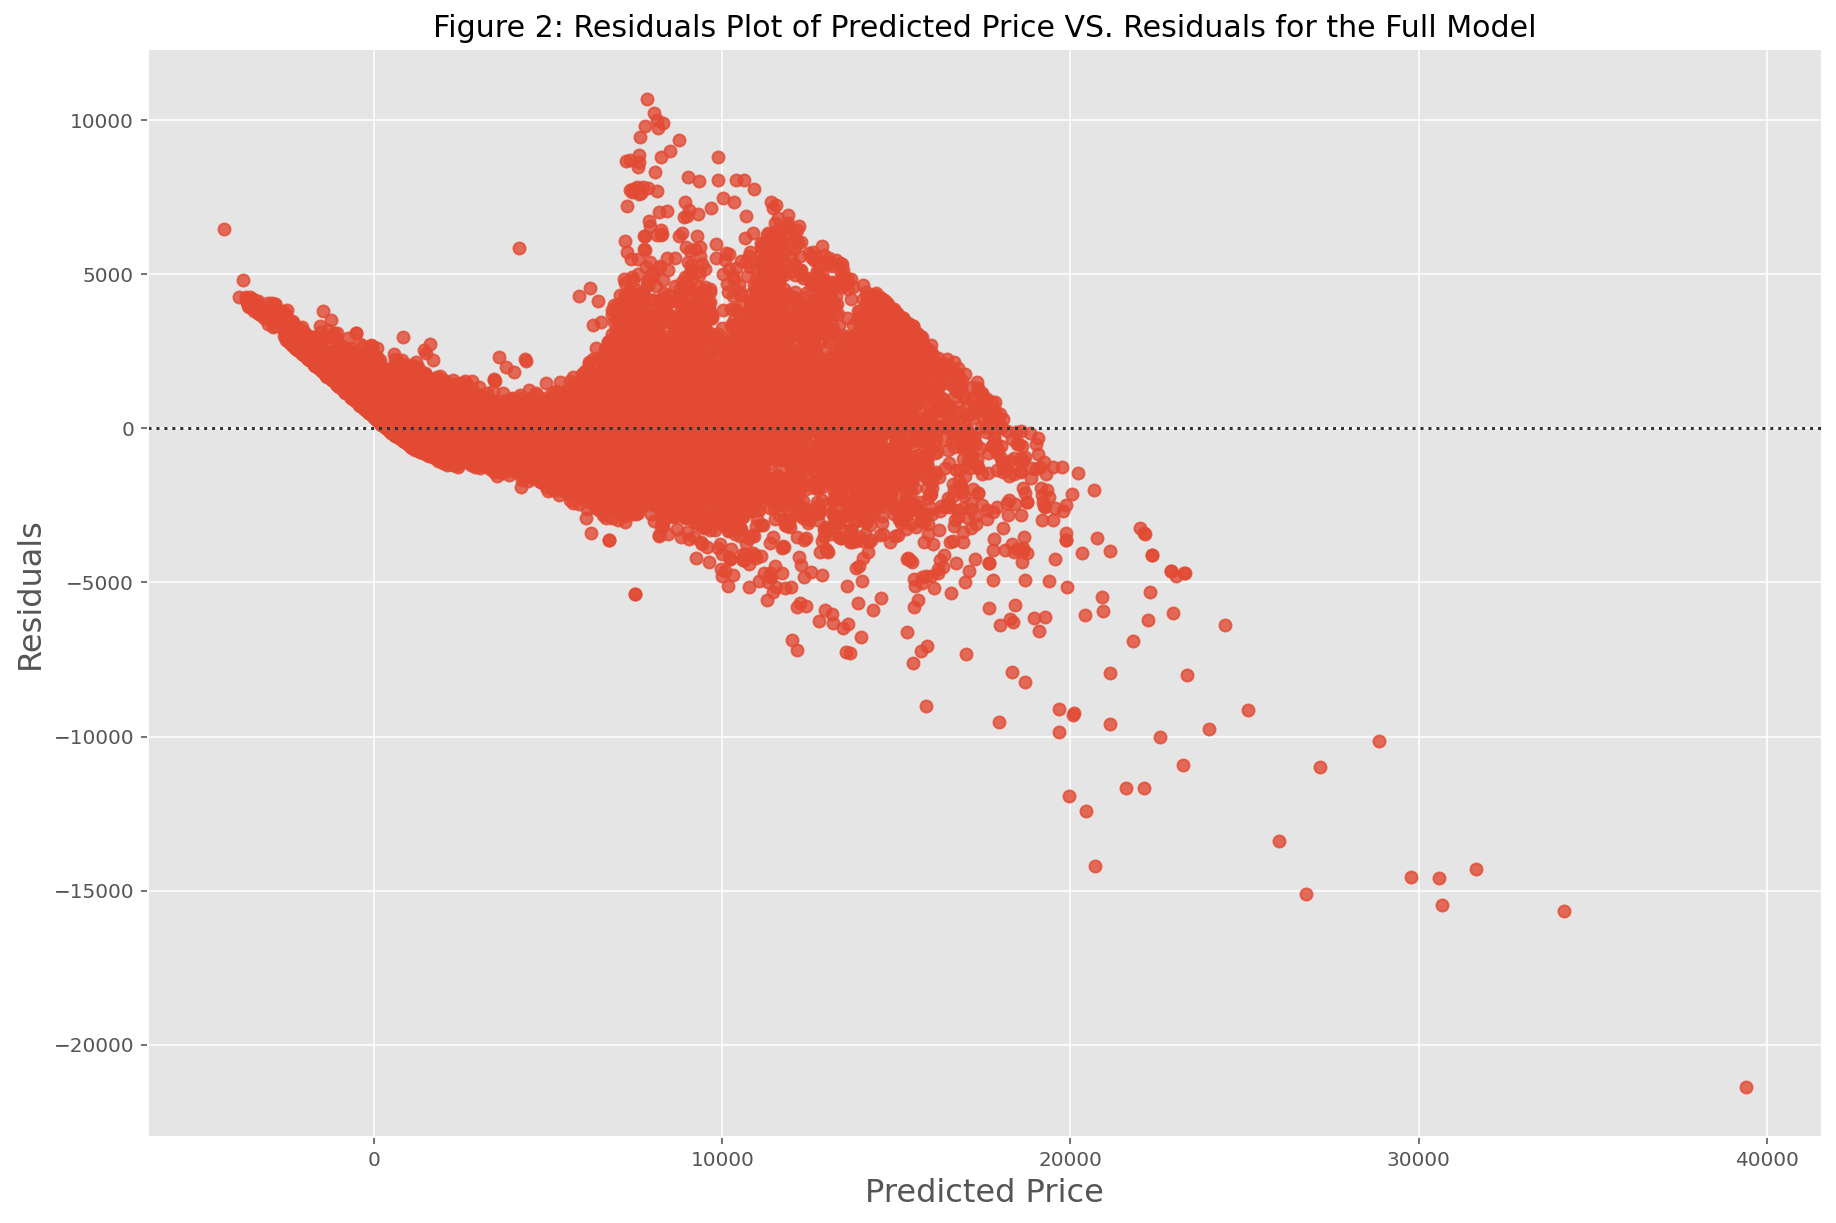

In [32]:
plt.figure(figsize=(15,10))
sns.residplot(x = residuals_full['predicted'], y = residuals_full['residual'])
plt.xlabel('Predicted Price', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.title('Figure 2: Residuals Plot of Predicted Price VS. Residuals for the Full Model', fontsize=15)
plt.show();

In Figure 3, the residual plot perform a comparison between the actual diamond price and the residuals for the full model. The plot present a notable observation of having the residuals demonstrate a distinctive curvaturem showing that it has an increasing trend, instead of dispersed around 0 in a horizontal band, making the assumption of constant variance is not likely to be true of multiple linear regression model. There is an extreme outlier occur (residuals of less than -20000, and predicted price of more than USD 17500) at the bottom-right corner of the graph, which present a huge concern in this dataset.


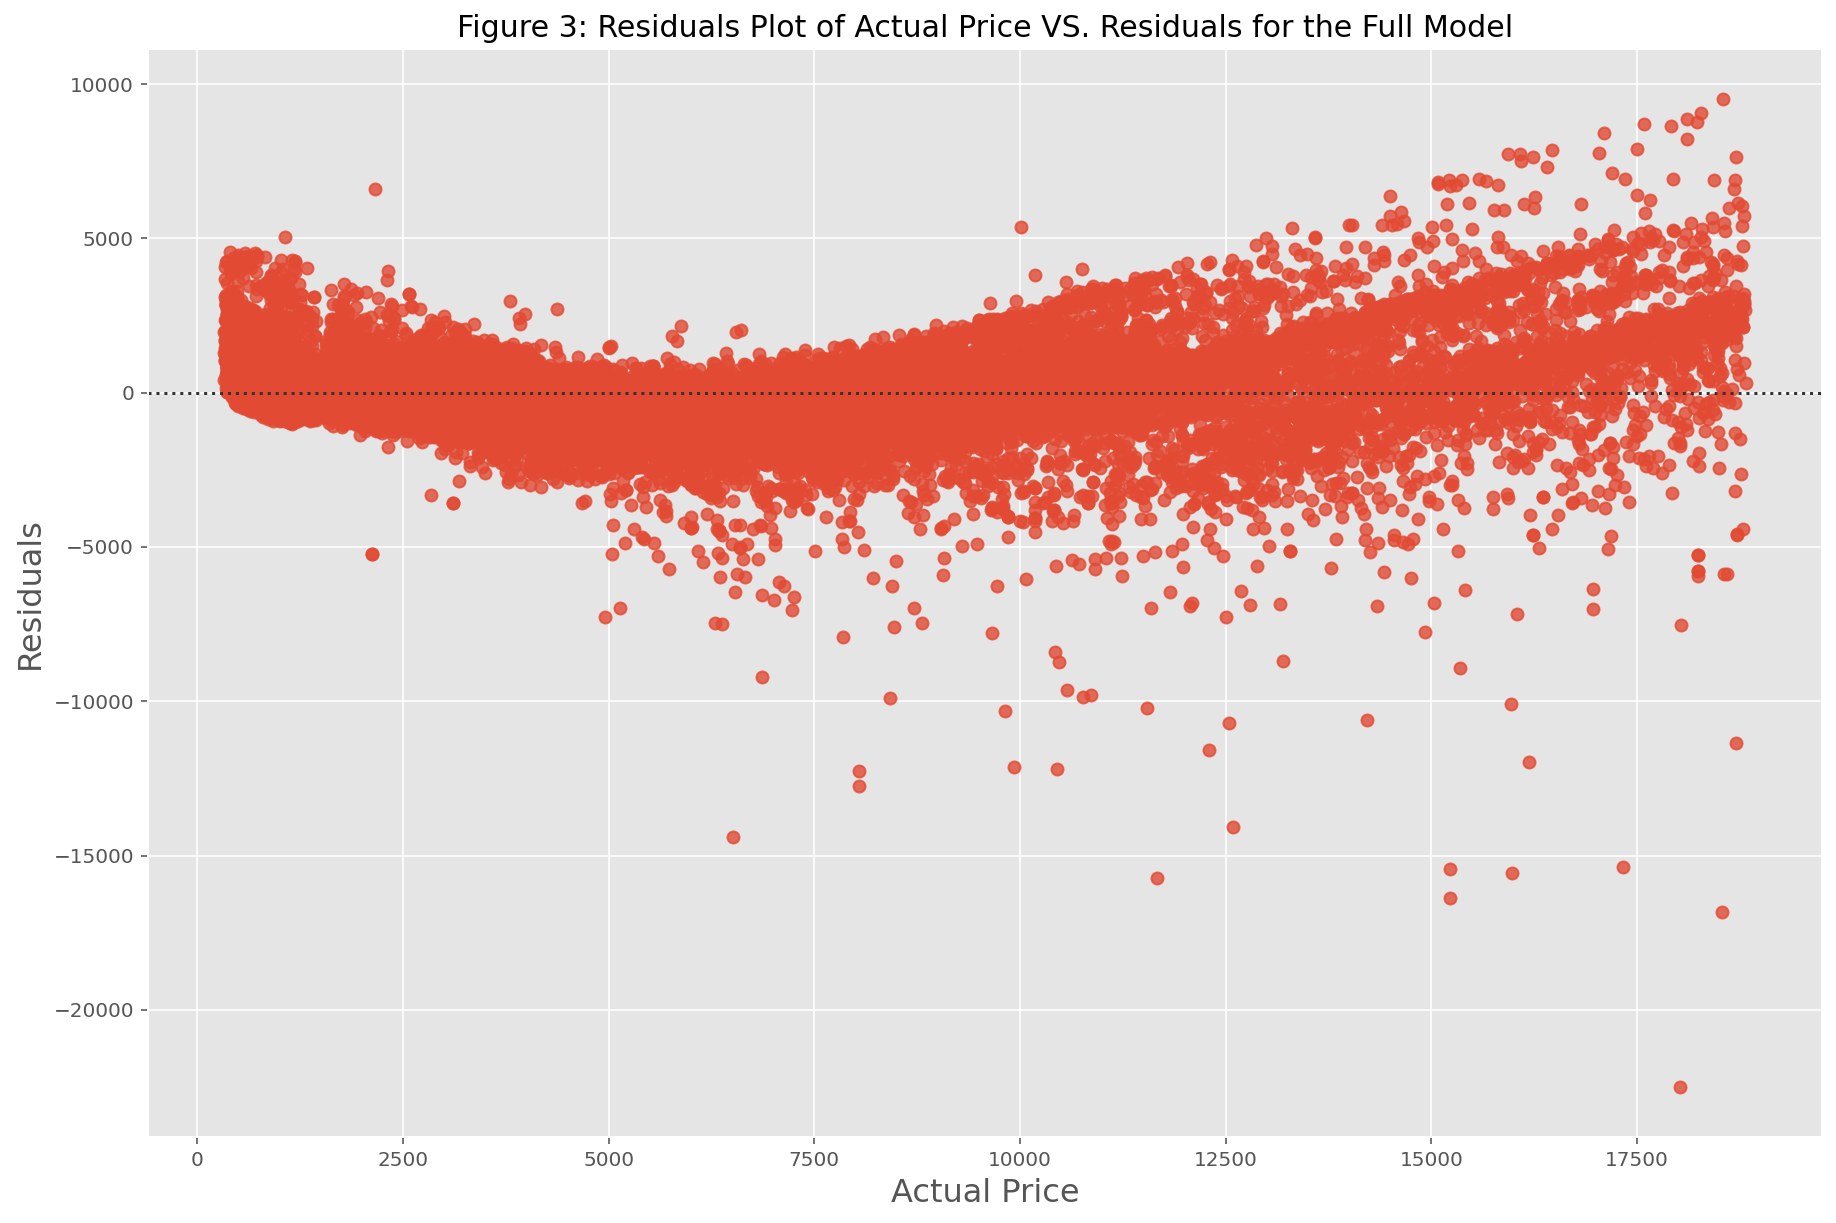

In [33]:
plt.figure(figsize=(15,10))
sns.residplot(x = residuals_full['actual'], y = residuals_full['residual'])
plt.xlabel('Actual Price', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.title('Figure 3: Residuals Plot of Actual Price VS. Residuals for the Full Model', fontsize=15)
plt.show();

In Figure 4, the histogram of the the actual price illustrate that its distribution is significantly right-skewed, meaning there are more diamonds fall within the price range of USD 1 to USD 1000 than the other price ranges. Similarly, the predicted price is also in right-skewed distribution. In practice, no diamond should be fall unders negative price range. Hence, it present an extrapolation (predicted price is beyond the original price range) by the full model that we should take note of.

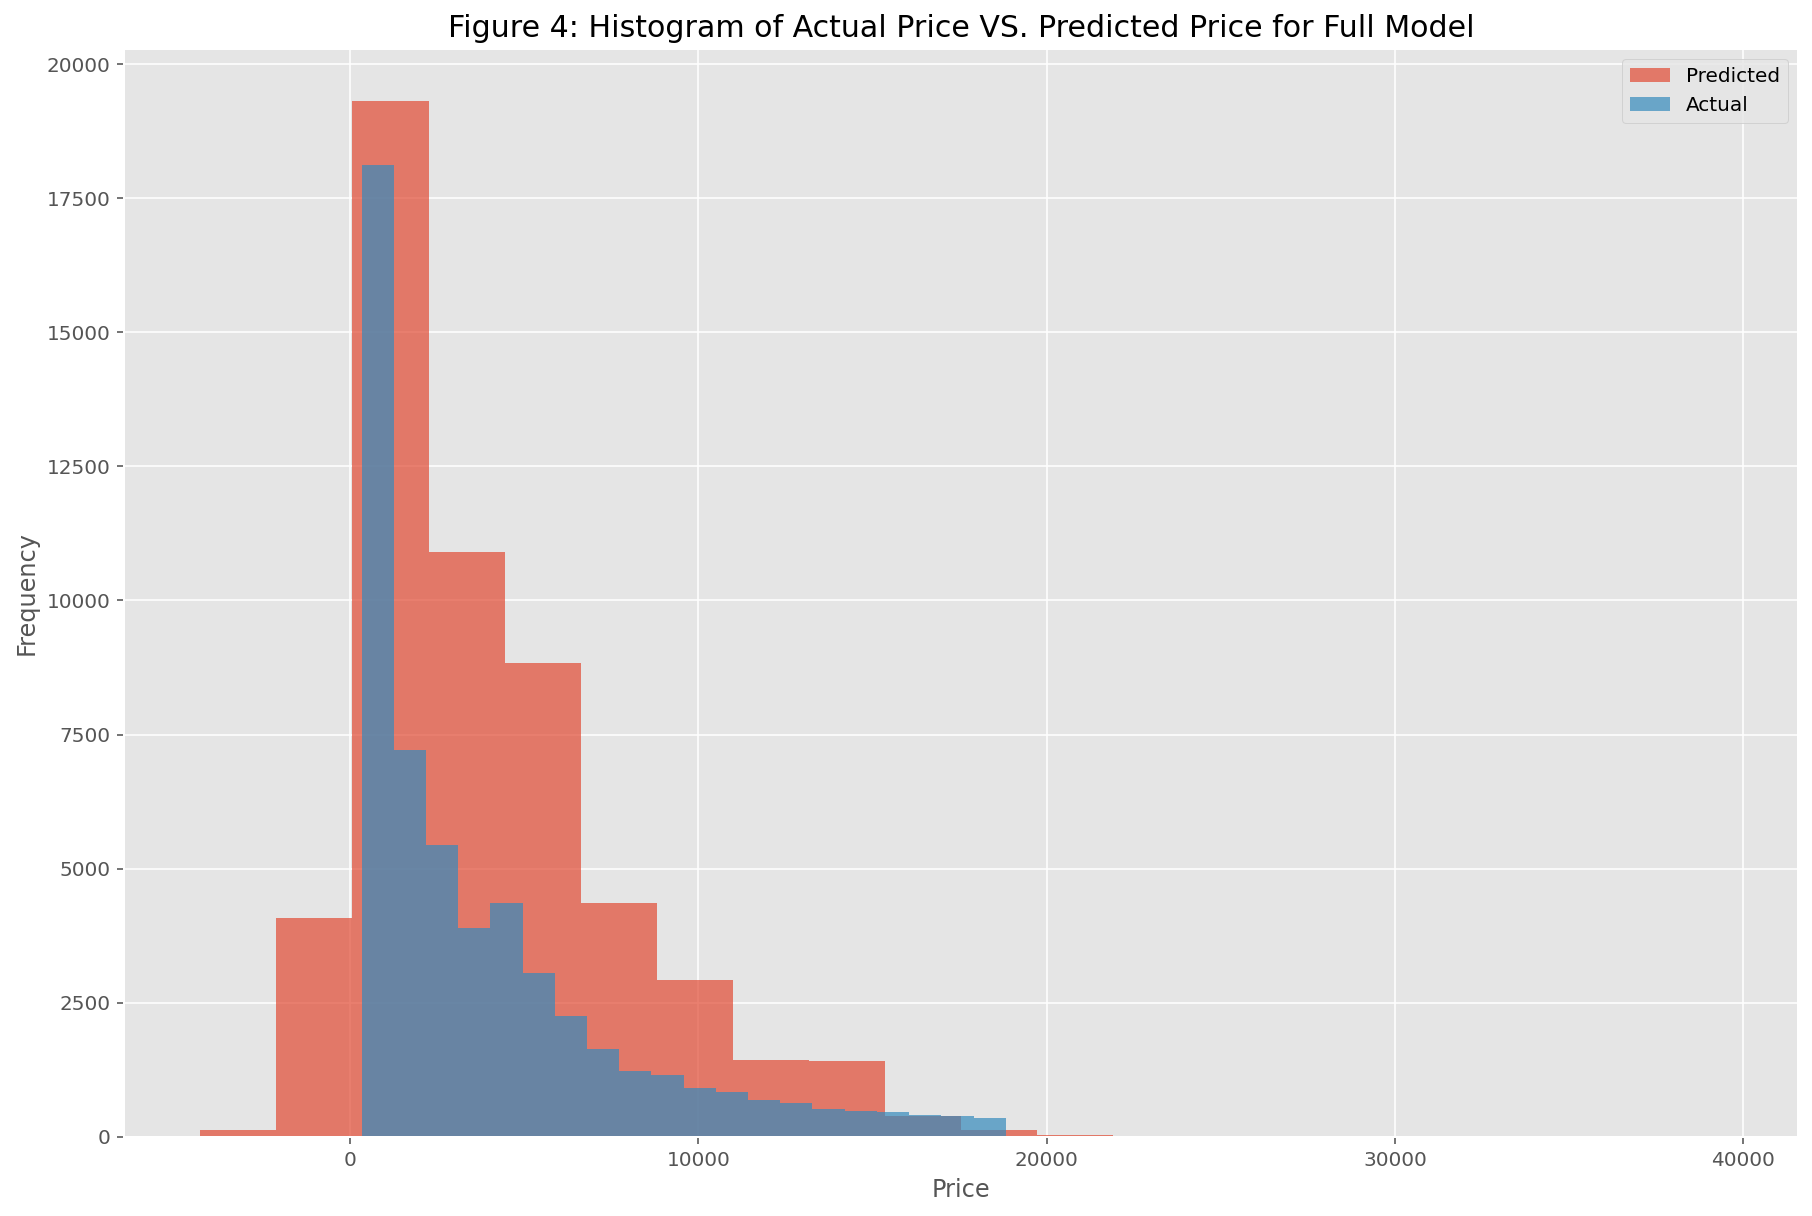

In [34]:
plt.figure(figsize=(15,10))
plt.hist(residuals_full['predicted'], label='Predicted', bins=20, alpha=0.7);
plt.hist(residuals_full['actual'], label='Actual', bins=20, alpha=0.7);
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.title('Figure 4: Histogram of Actual Price VS. Predicted Price for Full Model', fontsize=15);
plt.legend()
plt.show();

In theory, the distribution of the residuals should be nearly normal. In Figure 5, the histogram of residual for full model is nearly symmetric and consist of a single prominent peak (unimodal) that fall under negative residuals while illustrating that there are no extreme outliers in this data set. Therefore, we could indicate that the residuals of full model clearly satisfy the condition of having nearly normal residuals.

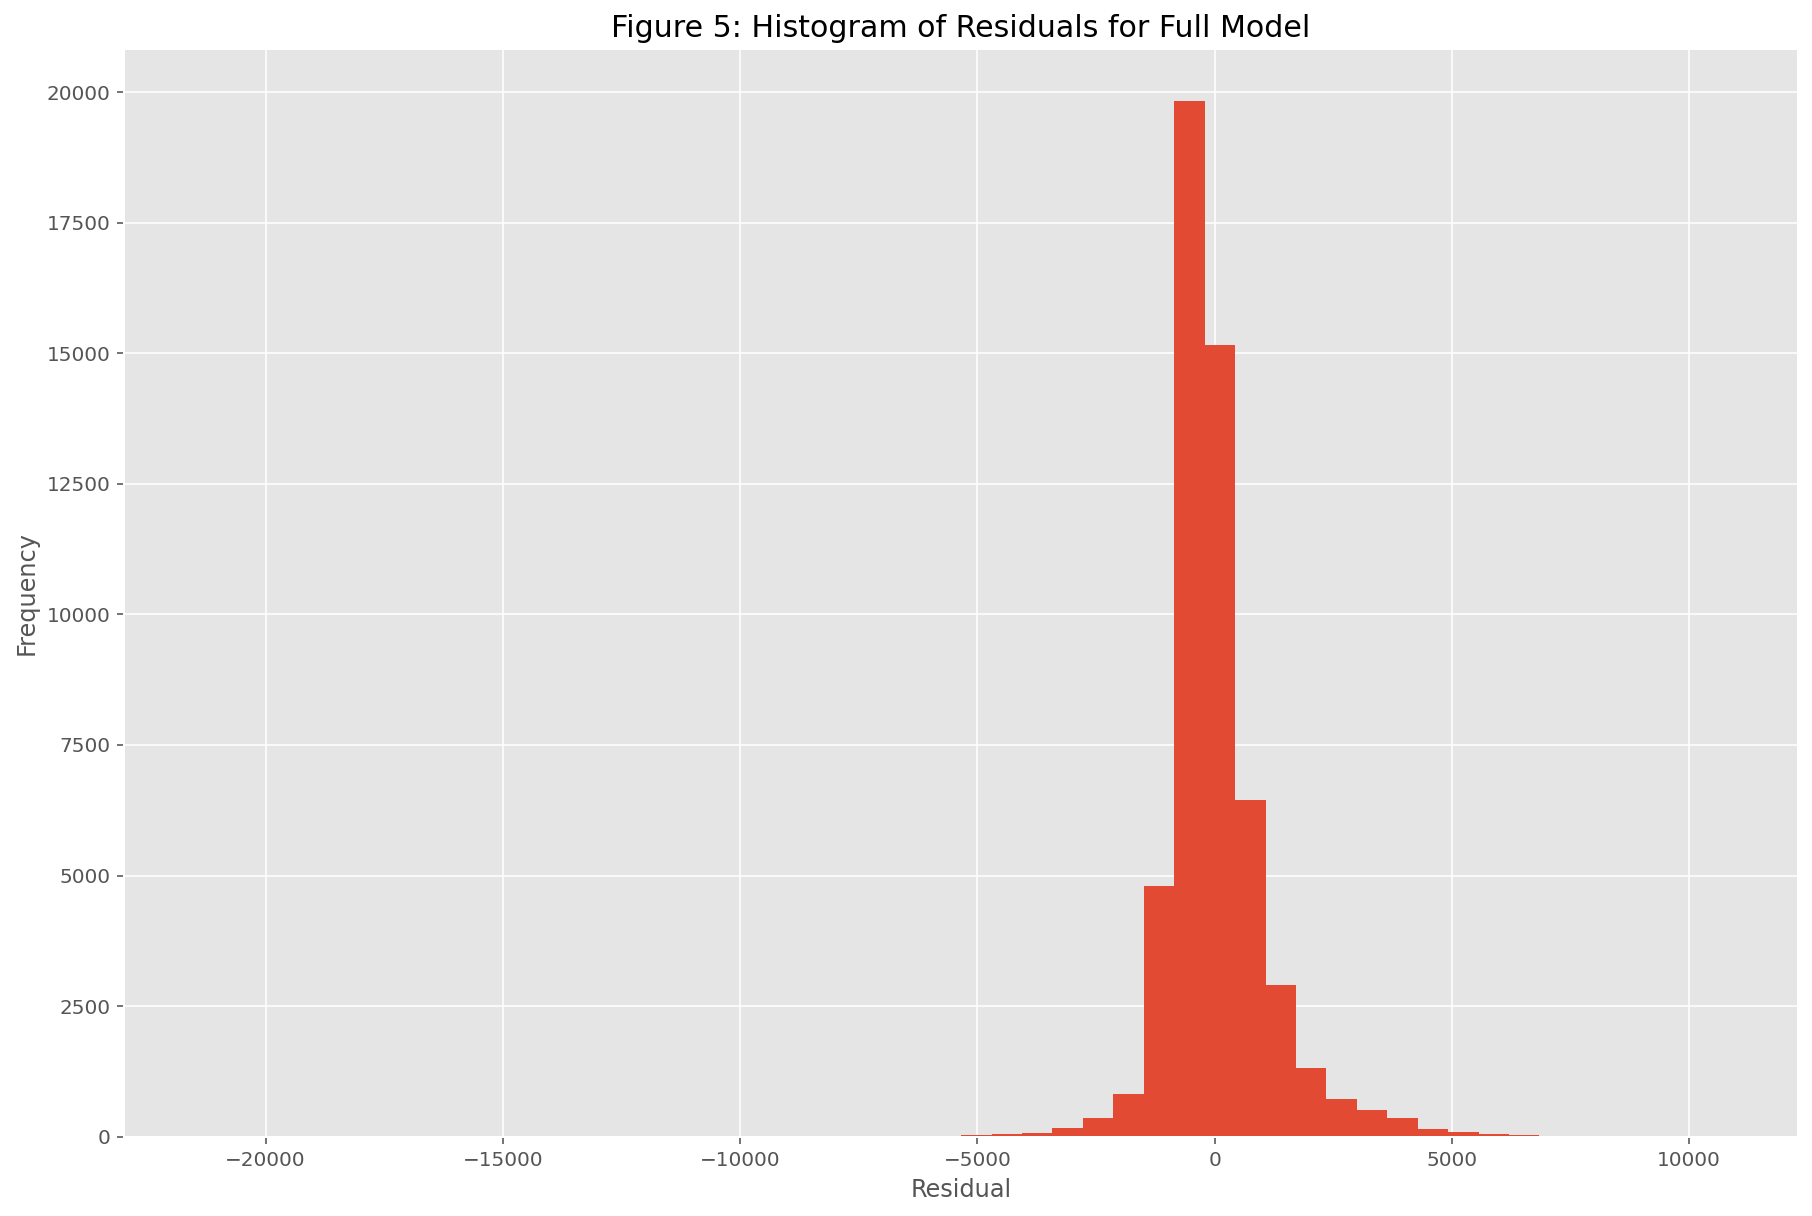

In [35]:
plt.figure(figsize=(15,10))
plt.hist(residuals_full['residual'], bins = 50);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 5: Histogram of Residuals for Full Model', fontsize=15);
plt.show();

The diamond dataset itself does not recognised as a time-series data, meaning the collection of different diamond's features' observations  is not obtained through repeated measurements over time. Hence, it is clear that the observations gained in the dataset are independent to each other which satisfy the condition of indepedent residual. In Figure 6, a scatter plot of residual and its order of the data collection is presented and there is an increasing trend presented from the order 20000 to 28000. This suggests misfittings or anomalies within the full model.

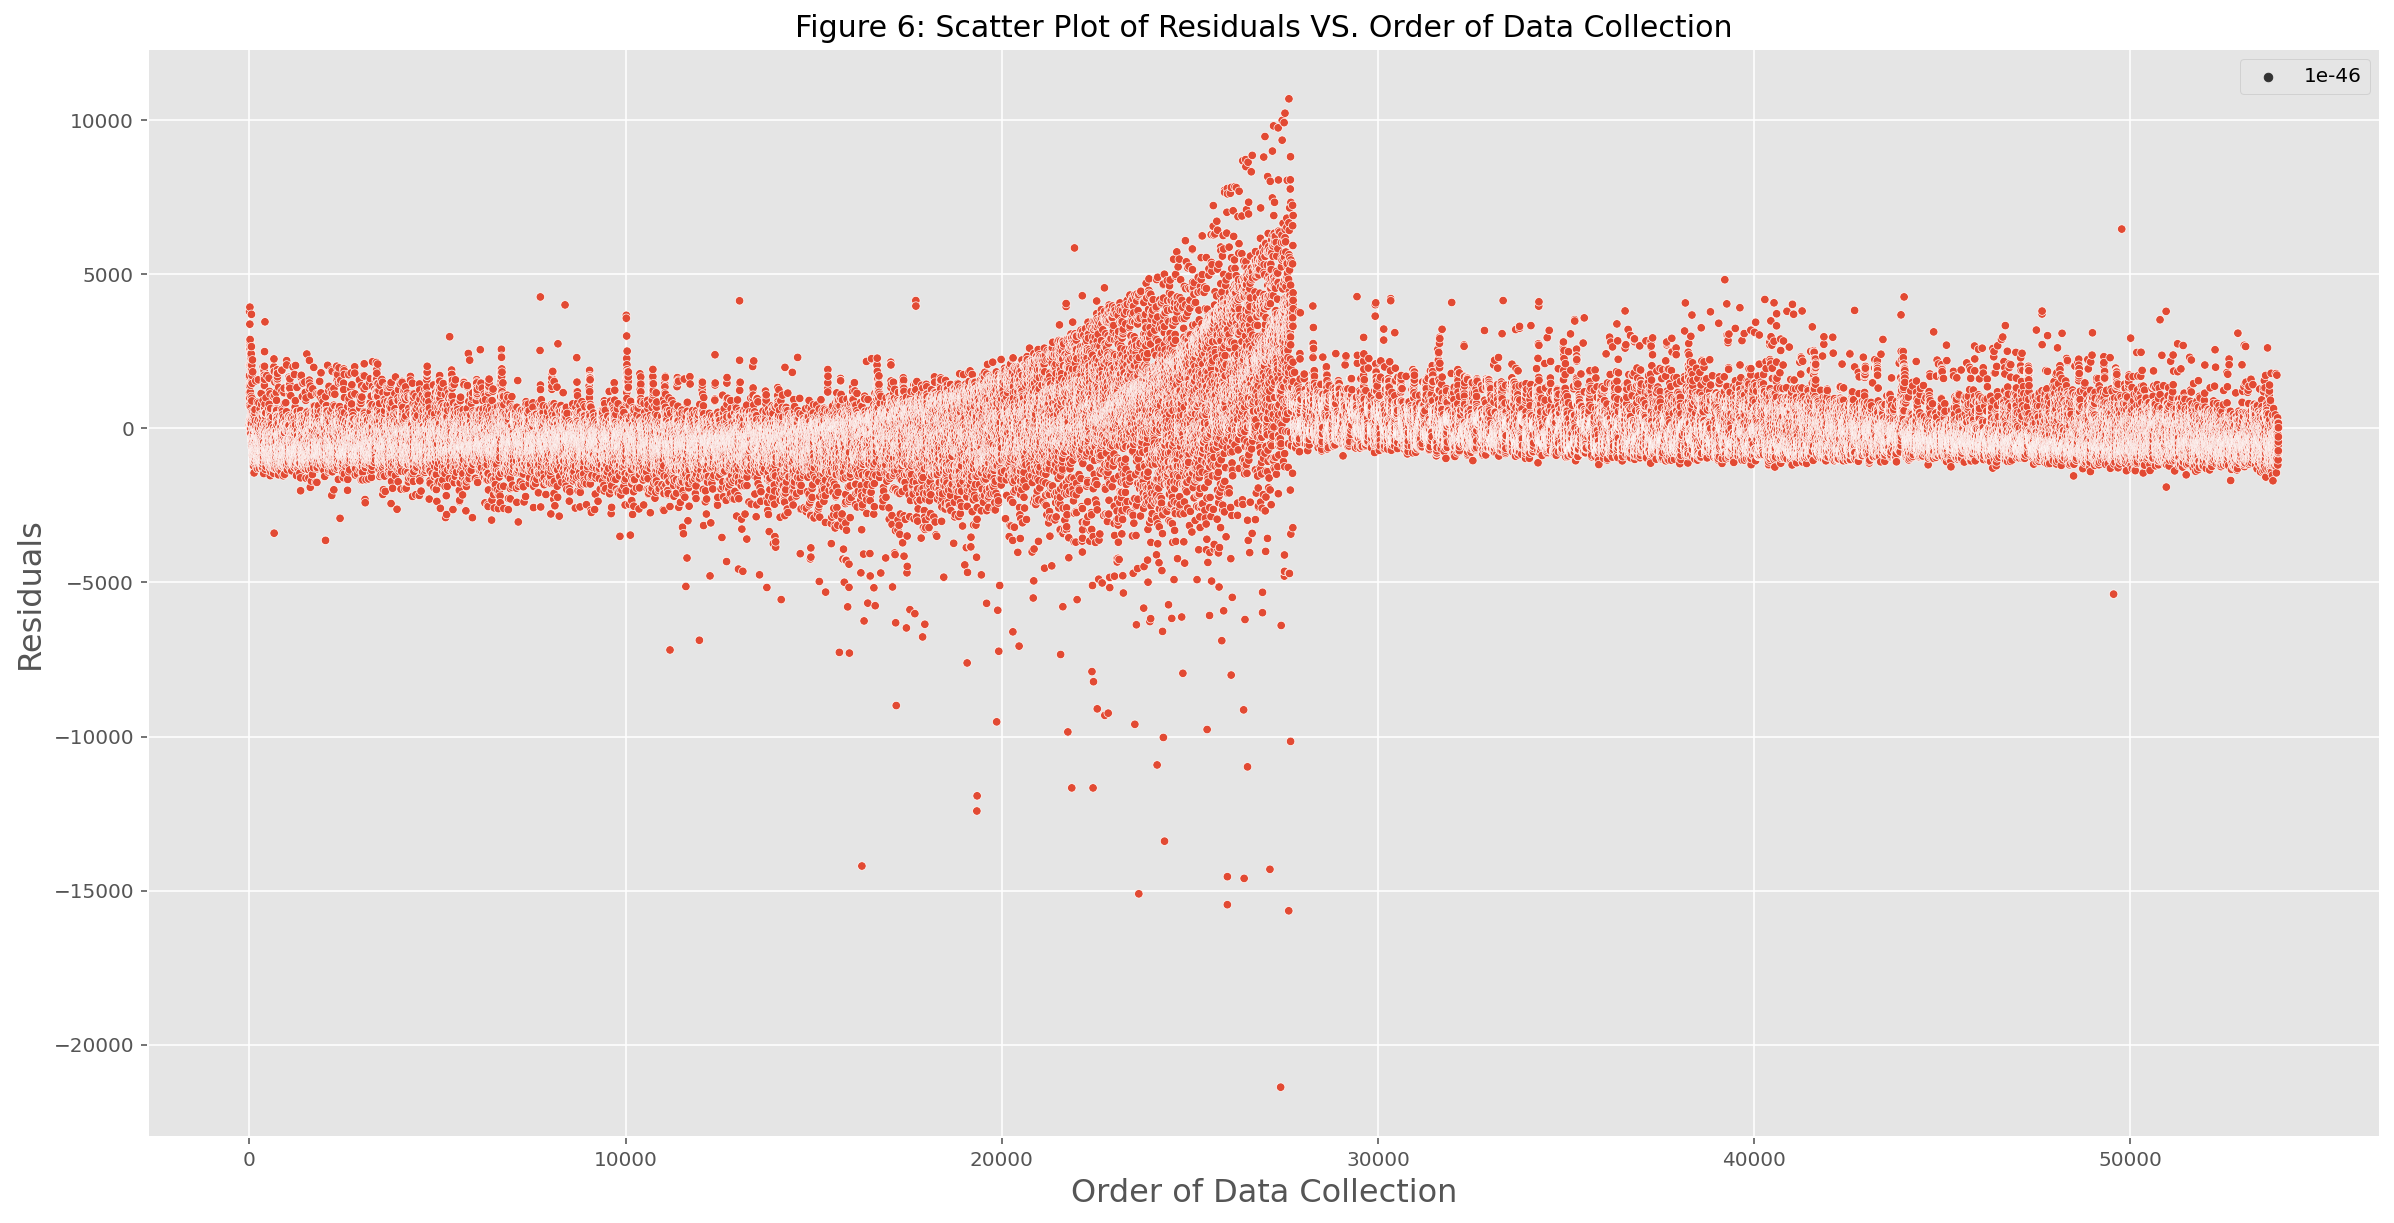

In [36]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = residuals_full['residual'].index, y = residuals_full['residual'], size = .0000000000000000000000000000000000000000000001)
plt.xlabel('Order of Data Collection', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.title('Figure 6: Scatter Plot of Residuals VS. Order of Data Collection', fontsize=15)
plt.show();

<a id="backward-selection"></a><h4>Backward Feature Selection</h4>
It is crucial to only include features that have a significant influence and are necessary for the model, thus we now do backwards feature selection using p-values to eliminate any irrelevant features. To decide which features to drop, we look for features with a significance level of less than 5% or a p-value less than 0.05.

In [37]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = full_model_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

print('\nPerforming backwards feature selection using p-values:')

while True:

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    

    linreg_fit = smf.ols(formula=patsy_description, data=data_encoded).fit()

###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = data_encoded).fit()
###

#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "width" with p-value 0.6192

Removing term "depth" with p-value 0.1488

***
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.944e+04
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:16:20   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53918   BIC:                         9.117e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>

From the code above, we eliminated the width and depth features because they had p-values of 0.6192 and 0.1488, respectively, and we then created a new OLS model using the new clean fitted model. As a result, we have completed the feature selection process by utilising backwards elimination to filter out features that were irrelevant for our model, as evidenced by the OLS Regression Result above, where no longer any features have a p-value below 0.05.

<a id="reduce-overview"></a><h4>Reduced Model Overview</h4>
We then create a new data frame to store the actual price, predicted price and the residuals for the reduced model, just as we did with the full model overview but without any insignificant features.

In [38]:
formula_string_vars_encoded = ' + '.join(data_encoded.drop(columns=['price', 'width', 'depth']).columns)
formula_string_encoded = 'price ~ ' + formula_string_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  price ~ carat + total_depth_percentage + table + length + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2


In [39]:
residuals_reduced = pd.DataFrame({'actual': data_encoded['price'], 
                                  'predicted': model_reduced_fitted.fittedvalues, 
                                  'residual': model_reduced_fitted.resid})
residuals_reduced.head(10)

,actual,predicted,residual
0,326,-1346.614726,1672.614726
1,326,-662.895014,988.895014
2,327,215.495406,111.504594
3,334,-830.942042,1164.942042
4,335,-3460.396928,3795.396928
5,336,-1382.081003,1718.081003
6,336,-398.775782,734.775782
7,337,-1073.647468,1410.647468
8,337,-1044.665285,1381.665285
9,338,-418.429847,756.429847


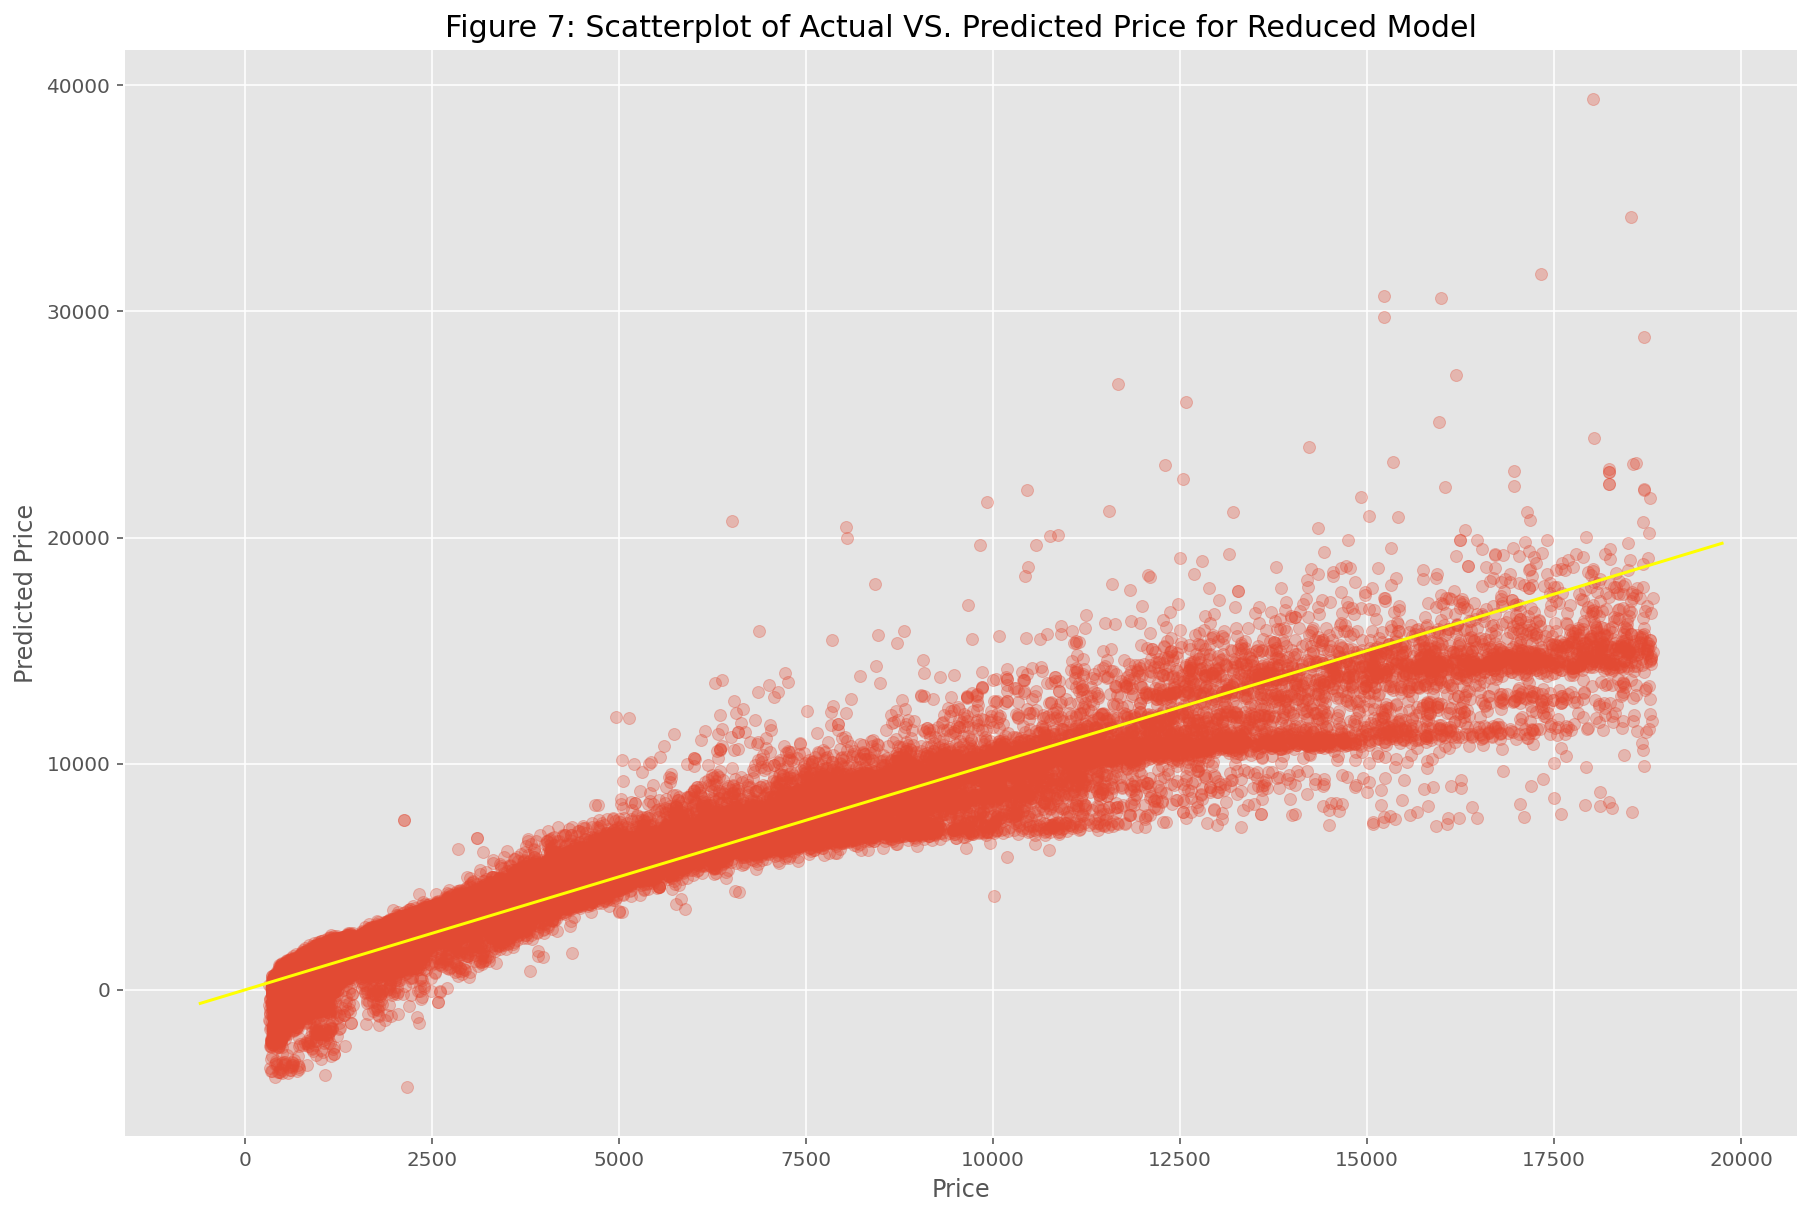

In [40]:
# get a scatter plot
plt.figure(figsize=(15,10))
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="yellow");
plt.xlabel('Price');
plt.ylabel('Predicted Price');
plt.title('Figure 7: Scatterplot of Actual VS. Predicted Price for Reduced Model', fontsize=15);
plt.show(); 

This model returns an adjusted R-squared of 0.92, which is similar to the Full Model adjusted R-squared, indicating that it still has 92% of the variance is explained by the reduced model, even with 2 less variable. The p-values show that, as predicted, all of them are significant at the 5% level as a result of the backwards feature selection. Figure 7 shows that our model still has the same problems, which is that the model exaggerates the expensive diamond prices while underestimating cheaper diamond prices. The diagnostic tests will now be run on this reduced model.

<a id="reduce-diagnostic"></a><h4>Reduced Model Diagnostic Checks</h4>
We will now plot the residuals and predicted price for the Reduced Model into a scatter plot.


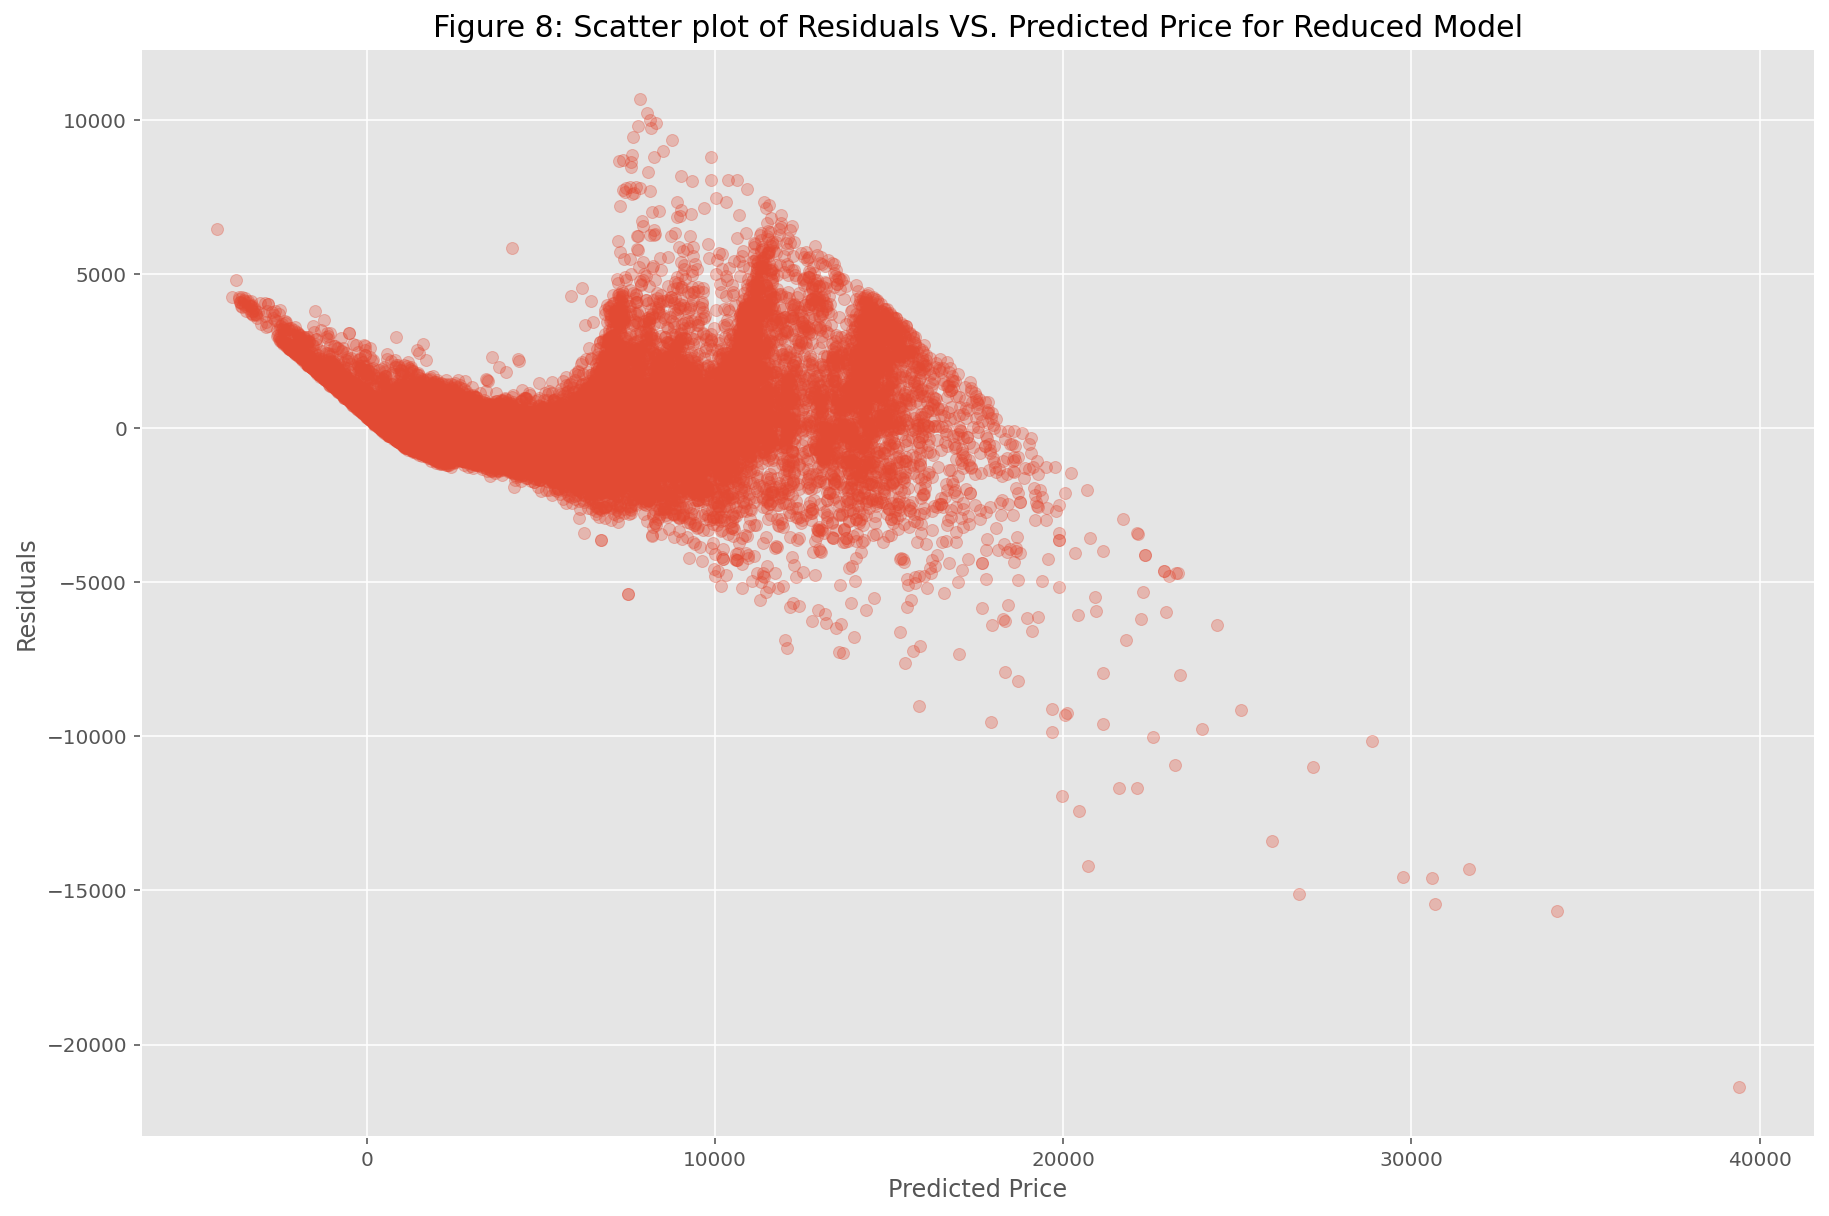

In [41]:
plt.figure(figsize=(15,10))
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Figure 8: Scatter plot of Residuals VS. Predicted Price for Reduced Model', fontsize=15)
plt.show();

Figure 2 and Figure 8 have a striking resemblance, indicating that the residuals have the same banding pattern even though the value of the residuals between the Full Model and the Reduced Model has a slight difference. Next we will create a histogram of the residuals for the reduced model.

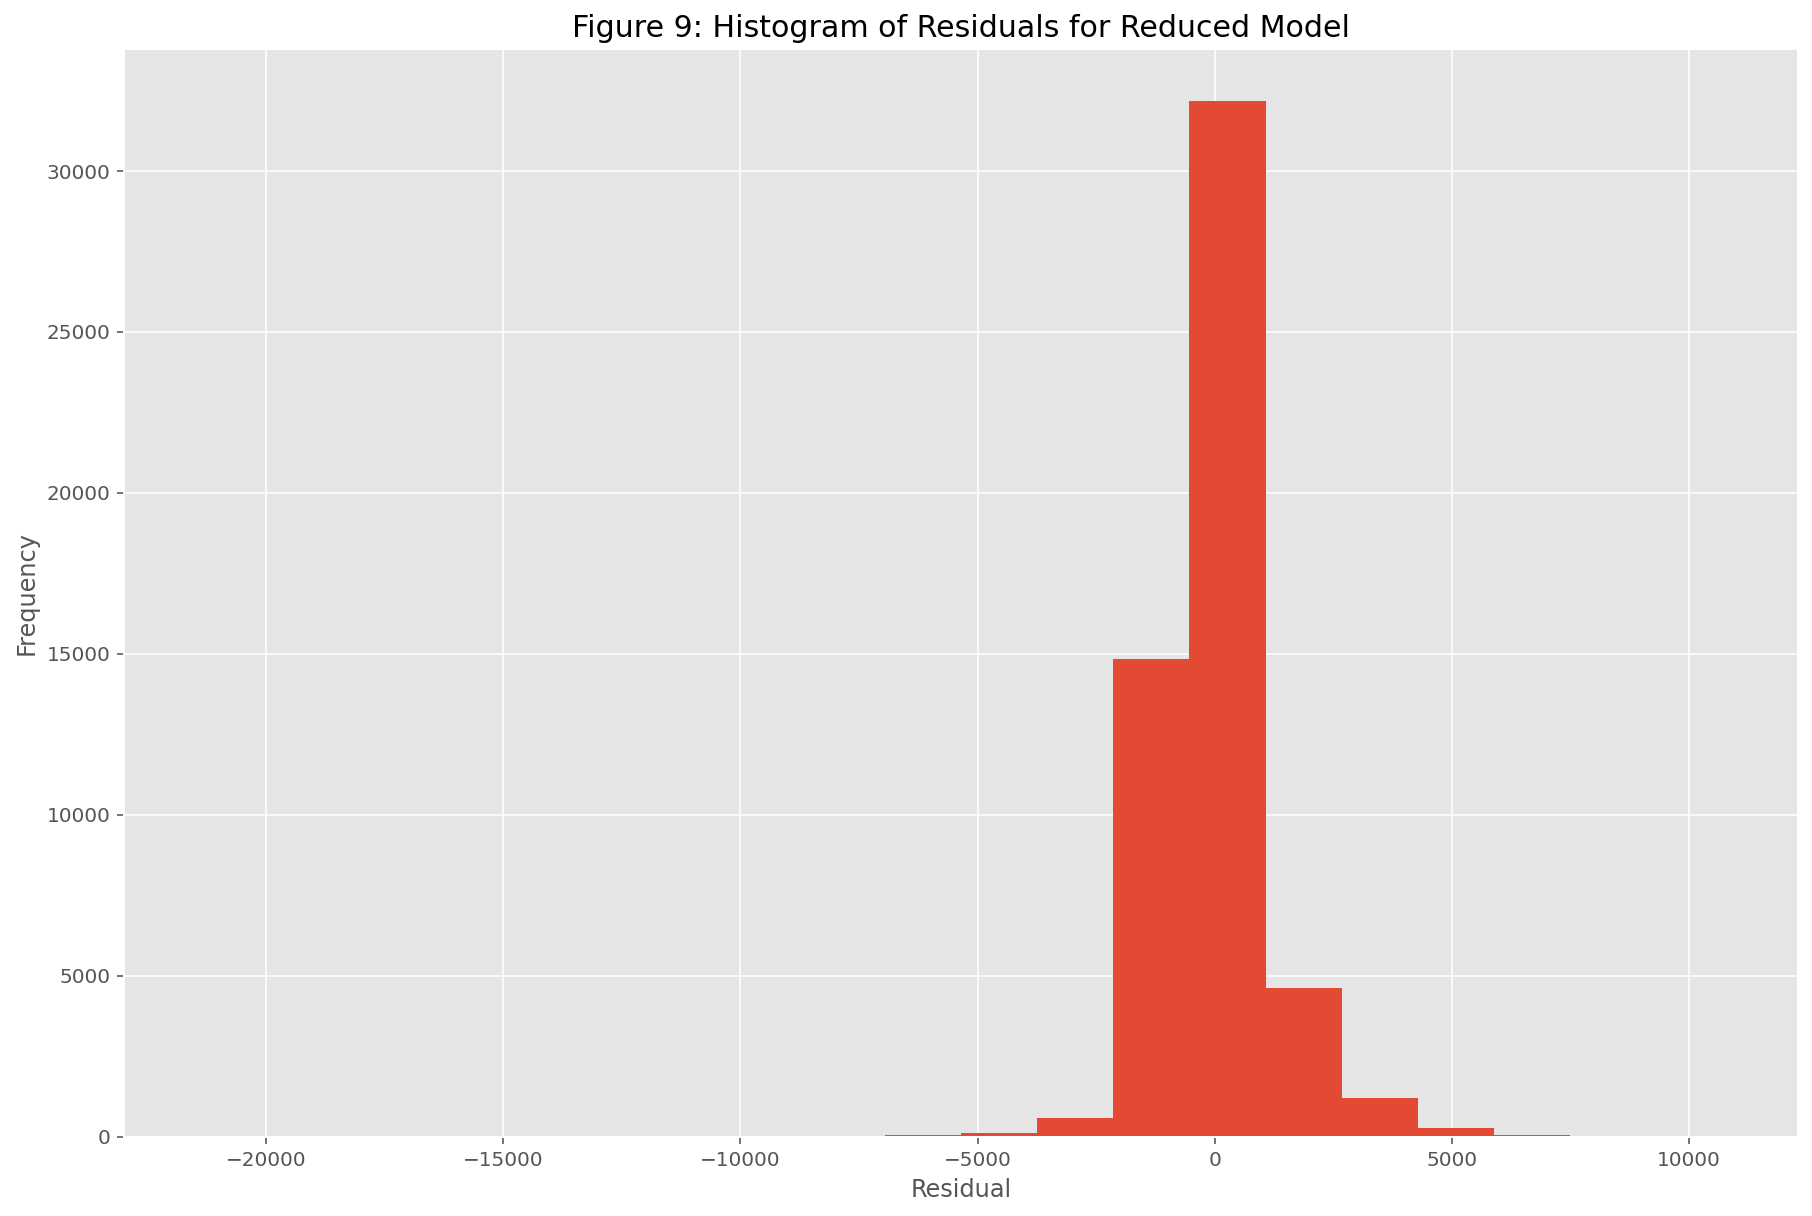

In [42]:
plt.figure(figsize=(15,10))
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 9: Histogram of Residuals for Reduced Model', fontsize = 15)
plt.show();

From Figure 9, we can see that the histogram of the residuals for reduced model is unimodal with the peak of the residuals above 30000, veering to the right and is almost symmetrical. The histogram also indicate that residuals are distributed nearly evenly around zero which indicates that the normality assumption is likely to be true.

<a id="critique-limitation"></a><h3><b>Critique and Limitations</b></h3>

<a id="summary-and-conclusion"></a><h3><b>Summary and Conclusions</b></h3>
<a id="project-summary"></a><h4>Project Summary</h4>
Our project's objective is about predicting diamond prices using statistical modelling, but we must first clean and process the data which is what we did in our Phase 1 report. We chose the diamonds dataset from Dr. Akman's GitHub as the starting point of our research and defined what we wanted to predict as a goal for our report, which we ended up with predicting diamond prices. The dataset is next examined to determine its feature set and total number of observations. Then, we identify the response variable for our project, which is the price of diamonds in US dollars, and display its features as well as its information, including data type, units, and descriptions, in a table. 

In our data cleaning and preprocessing section of our Phase 1 report, we initially clean the data by removing any rows that contains missing values and outliers that is based on the diamond's carat. However, we discovered that the dataset does not contain any missing values by using the isnull().sum() function from Pandas. Before we remove the outliers, we wanted to know the total number of outliers present in this dataset. So, to get the total number of outliers, we first calculate the lower and upper quartiles of the carat feature which allows us to determine the interquartile range (IQR). Next, we determine the upper and lower whisker using the interquartile range, as well as the lower and upper quartile. By filtering the rows of the carat feature whose carat is lower than the lower whisker or higher than the upper whisker, the total number of outliers is then obtained. After the outliers have been removed, we assigned the carat column with values that are not outliers.

Additionally, we made the decision to not remove any features from this dataset as we think that all of the features are relevant in predicting the price of a diamond. We opted not to change any of the data types of the features because they already corresponded to what we had in mind. To finalised our data cleaning process, we display 5 random rows from our cleaned data.

Following the dataset's cleaning, we provided a wide range of graphs to illustrate the relationship between the dataset's features and the price of diamonds. The values are plotted into various graph forms, including histograms, bar charts, violin plots, box plots, boxen plots, scatter plots, bar plots, and strip plots, each of which comprises one, two, or three variables for comparison. We used the cut, colour grade, clarity, and carat variables for 1-variable plots to determine the frequency of each category in each of the selected variables, along with a brief description of each graph. For 2 variable plots, we chose to compare the pricing of diamonds based on the cut, colour grade, clarity, and carat value, and length. To assess the strength of the relationship between price with carat and length, we additionally apply the Pearson Correlation Coefficient formula from the scipy.stats module. Last but not least, we apply nearly all of the features to be compared with the price for the three variable plots, with the exception of the length, depth, width, and total depth percentage variable.

In our Phase 2 report, we first provide an overview of our full model by forming the statistical model formula for this dataset into a Python string. The formula begins with the price, which serves as the target feature of our report, and is followed by the numerical variables and the one-hot encoded category features. After the formula is established, we build an OLS model with price acting as the dependent variable for the encoded features. Then, in order to compare the actual and predicted prices and plot them onto graphs, we establish a new data frame that stores the values of the actual, predicted, and residuals. Diagnostic plots are created to check the validity of the full model based on the 4 different conditions. In particular, scatter plots and histograms are used to compare the residuals value, predicted price and the actual price of the full model. These are to examine the variability, distribution pattern and independence of the residuals.

We then proceed by doing backwards feature selection after running a diagnostic check on the entire model. This is done to ensure that the model only contains features that are essential to it and have a meaningful impact. Any irrelevant features, defined as those with a significance level of less than 5% or a p-value less than 0.05, are removed using the backwards feature selection technique. After eliminating the irrelevant variables, we generated a new OLS model to analyse any differences between the full model and the now reduced full model, as well as to ensure that there are no more variables with p-values less than 0.05.

After confirming that the model has no irrelevant features, we present an overview of the reduced model in the same way that we did for the full model. To check for discrepancies between the full and reduced models, we first build a new data frame to hold the reduced values of the actual and predicted price of diamonds, together with their residuals and then we generate them into scatterplots. Finally, we conduct a diagnostic check to validate our reduced model using the same assumptions as we did for the complete model: linearity, nearly normal residuals, constant variability, and independence of residuals. Besides that, diagnostic checks are carried out to see if the reduced model violates any of the 4 assumptions.

<a id="summary-findings"></a><h4>Summary of Findings</h4>
Given that this is a multiple linear regression problem, the residual plot in Figure 1 compares residuals and the projected price. The residual plot demonstrates that it does not meet the requirements for continuous variability for this kind of model. To avoid potential violations like collinearity between the predictors, residual value is employed on the y-axis in place of anticipated price.

In this dataset, there is a severe outlier that occurs in the bottom-right corner of the graph (residuals of less than -20000 and predicted price of more than USD 17500). Figure 3's residual plot shows a comparison between the whole model's residuals and the actual diamond price. Instead of being scattered around 0 in a horizontal band, the plot's characteristic curve demonstrates that it has an increasing tendency.

There are much more diamonds that fall within the price range of USD 1 to USD 1000 than there are within the other price ranges, as can be seen in Figure 4's histogram of the real price of diamonds. No diamond should, in reality, fall into a negative pricing range. The whole model shows an extrapolation (predicted price is outside the initial price range) that we should be aware of.

There are no extreme outliers in this data set because they have been remove in our Phase 1 report, as shown by the histogram of residual for the complete model, which is virtually symmetric and has only one distinct peak (unimodal) that falls under negative residuals. The distribution of the residuals should, in theory, be very close to normal.

The scatter plot of the residual is shown, along with the sequence in which the data were collected. From order 20000 to 28000, an increasing trend is shown. This implies that the entire model has anomalies. The diamond dataset also does not qualify as a time-series data, since the observations of the various diamond features are not the result of repeated measurements made over time.

<a id="conclusions"></a><h4>Conclusions</h4>
In this Phase 2, we examined statistical modelling of diamond price trends. We initially prepared a Python string containing all of the independent variables from our dataset in order to fit a multiple linear regression. Using Pandas' get dummies function, the categorical features in our dataset are one-hot encoded, and the encoded features are then added to the regression model's formula.

After that, we looked at the relationship between the quantity of data and the level of residual freedom. To determine the correlation between the actual and anticipated prices of diamonds, we employed a straightforward least squares regression model. Numerous details about the dataset were included in the OLS regression results table, including the dependent variable, t-statistics, p-values, and confidence ranges. We create a new data frame to better analyse the discrepancy between the actual and forecasted diamond prices.

Then, using the assumptions of linearity, nearly normal residuals, constant variability, and independent residuals, we performed diagnostic checks. When using reverse feature selection, we look for features with p-values above 0.05 in order to eliminate those that are not statistically significant. With the unnecessary features removed, this is comparable to what we performed in the Full Model Overview and Full Model Diagnostic Checks.

<a id="references"></a><h3><b>References</b></h3>
<ul>
    <li>Akman, D., Yenice, Z., Wong, Y. K., Ture, I., & Malekipirbazari, M. (n.d). <i>Regression Case Study: Predicting Age in Census Data</i>. Retrieved October 19, 2022, from <a href="https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study-predicting-age-in-census-data/#Statistical-Modeling-and-Performance-Evaluation">https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study-predicting-age-in-census-data/#Statistical-Modeling-and-Performance-Evaluation</a></li>
    <li>GeeksforGeeks (2022). <i>Interpreting the results of Linear Regression using OLS Summary</i>. Retrieved October 19, 2022, from <a href="https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/">https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/</a></li>
    <li>Srinidhi, S. (2019). <i>Backward Elimination for Feature Selection in Machine Learning</i>. Retrieved October 19, 2022, from <a href="https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4">https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4</a></li>
</ul>